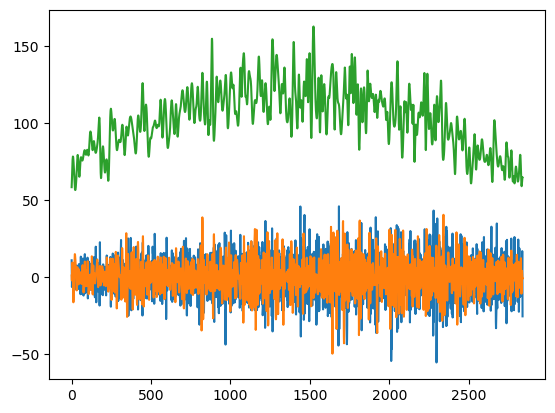

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte
from emd import sift

image = io.imread('UV_watchband_01.png', as_gray=True) # 2D image
eng_thr = 12
sift_thr = 1e-2
imfs = sift.sift(image[:,244], max_imfs=2, sift_thresh=sift_thr, energy_thresh=eng_thr) #emd mode decomposition, output 3 modes
# print(imfs[:,0].shape)
xs = np.arange(len(image[0]))
plt.plot(xs,imfs) # plot modes 

(2840, 4)


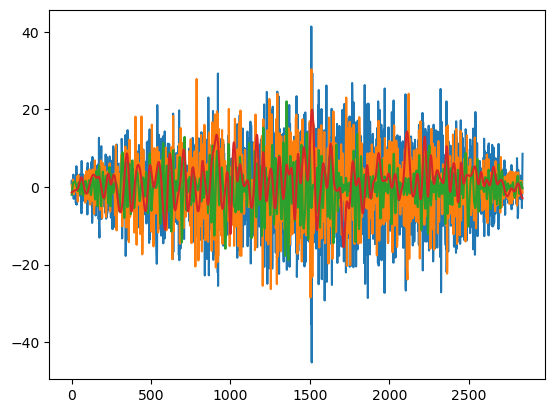

In [7]:
# mode1j = np.empty((len(image[0]), len(image[:,0])))
# mode2j = np.empty((len(image[0]), len(image[:,0])))
# mode3j = np.empty((len(image[0]), len(image[:,0])))

mode1i = np.empty((len(image[:,0]), len(image[0])))
mode2i = np.empty((len(image[:,0]), len(image[0])))
mode3i = np.empty((len(image[:,0]), len(image[0])))


for i in range(len(image[:,0])):
    imfs_i = sift.sift(image[i,:], max_imfs=2, sift_thresh=sift_thr, energy_thresh=eng_thr)
    # print(imfs_i)
    mode1i[i, :] = imfs_i[:, 0]
    mode2i[i, :] = imfs_i[:, 1]
    mode3i[i, :] = imfs_i[:, 2]
imfs_x = sift.sift(mode1i[:,2], sift_thresh=sift_thr, energy_thresh=eng_thr)
xs2 = np.arange(len(mode1i[:,0]))
print(imfs_x.shape)
plt.plot(xs2,imfs_x) # plot modes
plt.show()

# for j in range(len(image[0])):
#     imfs_j = sift.sift(image[:,j], max_imfs=2, sift_thresh=sift_thr, energy_thresh=eng_thr)
    
#     mode1j[j, :] = imfs_j[:, 0]
#     mode2j[j, :] = imfs_j[:, 1]
#     mode3j[j, :] = imfs_j[:, 2]
#     print(j)

# RX = np.empty((3, len(image[:,0]), len(image[0])))

# for m in range(3):
#     RX[m, :, :] = np.sum(CRX[m, :, :, :], axis=0)

# C1 = np.sum([CRX[m, 0, :, :] for m in range(3)], axis=0) + np.sum([CRX[0, n, :, :] for n in range(1, 3)], axis=0)
# C2 = np.sum([CRX[m, 1, :, :] for m in range(1, 3)], axis=0) + np.sum([CRX[1, n, :, :] for n in range(2, 3)], axis=0)
# C3 = CRX[2, 2, :, :]

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# ax2.imshow(image, cmap='inferno')
# ax1.imshow(C1 + C2 + C3, cmap='inferno')
# plt.show()

In [11]:
image = io.imread('/home/unitx/Downloads/macbook_images/VS_side01.png', as_gray=True) # 2D image

def corpsify(image, decomp_type):
    rows, cols = image.shape
    if decomp_type == 'R': # Row decomposition
        mode1 = np.empty((rows, cols))
        mode2 = np.empty((rows, cols))
        mode3 = np.empty((rows, cols))
        for i in range(rows):
            imfs = sift.sift(image[i, :], max_imfs=2, sift_thresh=sift_thr, energy_thresh=eng_thr)
            mode1[i, :] = imfs[:, 0]
            mode2[i, :] = imfs[:, 1]
            mode3[i, :] = imfs[:, 2]
    
    elif decomp_type == 'C': # Column decomposition
        mode1 = np.empty((rows, cols))
        mode2 = np.empty((rows, cols))
        mode3 = np.empty((rows, cols))
        for j in range(cols):
            imfs = sift.sift(image[:, j], max_imfs=2, sift_thresh=sift_thr, energy_thresh=eng_thr)
            # print(imfs.shape)
            mode1[:, j] = imfs[:, 0]
            mode2[:, j] = imfs[:, 1]
            mode3[:, j] = imfs[:, 2]

    return mode1, mode2, mode3

# Row decomposition
mode1ij, mode2ij, mode3ij = corpsify(image, 'R')

# Column decomposition
CMode11ij, CMode12ij, CMode13ij = corpsify(mode1ij, 'C')
CMode21ij, CMode22ij, CMode23ij = corpsify(mode2ij, 'C')
CMode31ij, CMode32ij, CMode33ij = corpsify(mode3ij, 'C')

C1 = CMode11ij + CMode21ij + CMode31ij + CMode12ij + CMode13ij + CMode23ij
C2 = CMode22ij + CMode32ij + CMode23ij + CMode33ij
C3 = CMode33ij

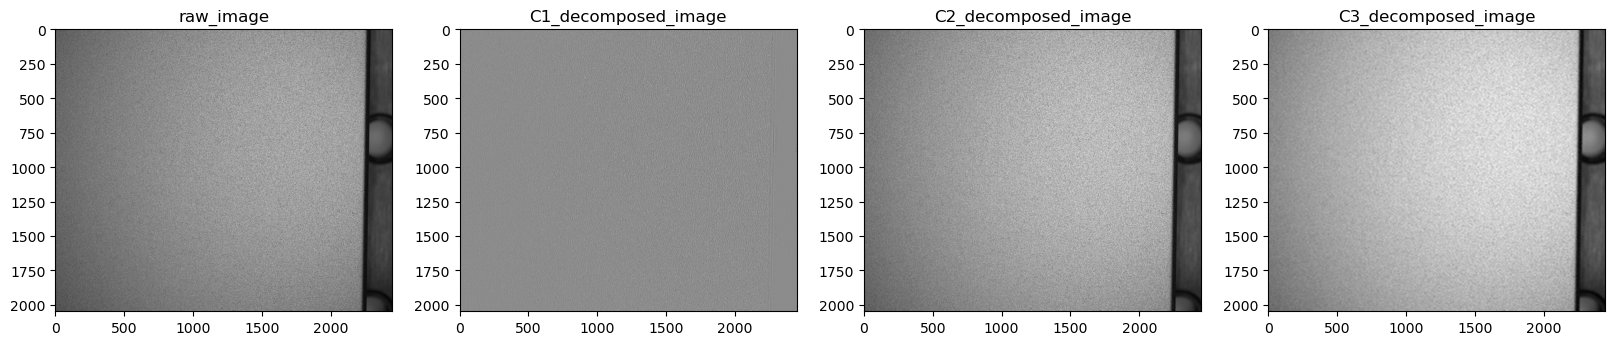

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
ax1.imshow(image, cmap='gray')
ax1.set_title('raw_image')
ax2.imshow(C1, cmap='gray')
ax2.set_title('C1_decomposed_image')
ax3.imshow(C2, cmap='gray')
ax3.set_title('C2_decomposed_image')
ax4.imshow(C3, cmap='gray')
ax4.set_title('C3_decomposed_image')
plt.show()


In [10]:
def save_as_png(array, filename):
    normalized_array = (array - np.min(array)) / (np.max(array) - np.min(array))
    uint8_array = img_as_ubyte(normalized_array)
    
    io.imsave(filename, uint8_array)
C4 = C2 + C3
save_as_png(C1, 'C1_image.png')
save_as_png(C2, 'C2_image.png')
save_as_png(C3, 'C3_image.png')
save_as_png(C4, 'C4_image.png')

